<a href="https://colab.research.google.com/github/matthewshawnkehoe/Data-Analysis/blob/main/convolutional_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff).

This notebook was generated for TensorFlow 2.6.

# The building blocks of neural networks

## A neural network for image classification

Let's look at a concrete example of a neural network that uses the Python library Keras to learn to classify handwritten digits. The problem we're trying to solve here is to classify grayscale images of handwritten digits (28 × 28 pixels) into their 10 categories (0 through 9). We’ll use the MNIST
dataset, a classic in the machine learning community, which has been around almost as long as the field itself and has been intensively studied. It's a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s.You
can see some MNIST samples in the figure below.

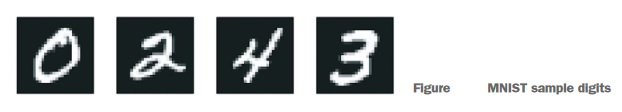

The MNIST dataset comes preloaded in Keras, in the form of a set of four NumPy
arrays.

**Loading the MNIST dataset in Keras**

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


`train_images` and `train_labels` form the training set, the data that the model will learn from. The model will then be tested on the test set, `test_images` and `test_labels`. The images are encoded as NumPy arrays, and the labels are an array of digits, ranging from 0 to 9. The images and labels have a one-to-one correspondence.

Let's examine at the training data:

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

And here's the test data:

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

The workflow will be as follows: First, we'll feed the neural network the training data, `train_images` and `train_labels`. The network will then learn to associate images and labels. Finally, we'll ask the network to produce predictions for `test_images`, and we'll verify whether these predictions match the labels from `test_labels`.

**The network architecture**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

The core building block of neural networks is the *layer*. You can think of a layer as a filter for data: some data goes in, and it comes out in a more useful form. Specifically, layers extract *representations* out of the data fed into them—hopefully, representations that are more meaningful for the problem at hand. Most of deep learning consists of chaining together simple layers that will implement a form of progressive *data distillation*. A deep learning model is like a sieve for data processing, made of a succession of increasingly refined data filters—the layers.

Here, our model consists of a sequence of two `Dense` layers, which are densely connected (also called *fully connected*) neural layers. The second (and last) layer is a 10-way *softmax classification* layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

To make the model ready for training, we need to pick three more things as part of the *compilation* step:

*   *An optimizer*—The mechanism through which the model will update itself based on the training data it sees, so as to improve its performance.
*   *A loss function*—How the model will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
*    *Metrics to monitor during training and testing*—Here, we'll only care about accuracy (the fraction of the images that were correctly classified).



**The compilation step**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Before training, we'll preprocess the data by reshaping it into the shape the model expects and scaling it so that all values are in the `[0, 1]` interval. Previously, our training images were stored in an array of shape `(60000, 28, 28)` of type uint8 with values in the `[0, 255]` interval. We'll transform it into a float32 array of shape `(60000, 28*28)` with values between 0 and 1.

**Preparing the image data**

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

We're now ready to train the model, which in Keras is done via a call to the model's `fit()` method—we *fit* the model to its training data.

**"Fitting" the model**

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 3ms/step - loss: 0.2661 - accuracy: 0.9239
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1070 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0700 - accuracy: 0.9786
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0523 - accuracy: 0.9843
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0378 - accuracy: 0.9891


Two quantities are displayed during training: the loss of the model over the training data, and the accuracy of the model over the training data. We quickly reach an accuracy of 0.989 (98.9%) on the training data.

Now that we have a trained model, we can use it to predict class probabilities for new digits—images that weren't part of the training data, like those from the test set.

**Using the model to make predictions**

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 68ms/step


array([6.42607745e-08, 1.41871193e-09, 2.33890951e-05, 1.27340745e-05,
       8.28392285e-11, 1.21546977e-08, 1.01412524e-11, 9.99961495e-01,
       1.02628564e-06, 1.20788843e-06], dtype=float32)

Each number of index `i` in that array corresponds to the probability that digit image `test_digits[0]` belongs to class `i`.

This first test digit has the highest probability score (0.99999106, almost 1) at index 7, so according to our model, it must be a 7:

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.9999615

We can check that the test label agrees:

In [ ]:
test_labels[0]

7

On average, how good is our model at classifying such never-before-seen digits? Let's check by computing average accuracy over the entire test set.

**Evaluating the model on new data**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0638 - accuracy: 0.9814
test_acc: 0.9814000129699707


The test-set accuracy turns out to be 97.8%—that’s quite a bit lower than the training-set accuracy (98.9%). This gap between training accuracy and test accuracy is an example of overfitting: the fact that machine learning models tend to perform worse on new data than on their training data. Overfitting is a central topic in machine learning.

A well known alternative for image-classification problems involving small training datasets are known as *convnets*. Let's investigate setting up a convolutional neural network.

# Deep learning for computer vision

Computer vision is the earliest and biggest success story of deep learning. Every day, you're interacting with deep vision models—via Google Photos, Google image search, YouTube, video filters in camera apps, OCR software, and many more. These models are also at the heart of research in autonomous driving,
robotics, AI-assisted medical diagnosis, autonomous retail checkout systems, and
even autonomous farming.

Computer vision is the problem domain that led to the initial rise of deep learning between 2011 and 2015. A type of deep learning model called *convolutional neural networks* started getting remarkably good results on image classification competitions around that time, and early successes in 2011 and 2012 led to other computer vision tasks.

We're about to dive into the theory of what convnets are and why they have been so successful at computer vision tasks. But first, let's take a practical look at a simple convnet example that classifies MNIST digits. The following listing shows what a basic convnet looks like. It's a stack of `Conv2D`
and `MaxPooling2D` layers. You`ll see in a minute exactly what they do.



## Introduction to convnets

**Instantiating a small convnet**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

Importantly, a convnet takes as input tensors of shape `(image_height, image_width, image_channels)`, not including the batch dimension. In this case, we'll configure the convnet to process inputs of size `(28, 28, 1)` , which is the format of MNIST images.

Let's display the architecture of our convnet.

**Displaying the model's summary**

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

You can see that the output of every `Conv2D` and `MaxPooling2D` layer is a rank-3 tensor of shape `(height, width, channels) `. The width and height dimensions tend to shrink as you go deeper in the model. The number of channels is controlled by the first argument passed to the `Conv2D` layers `(32, 64, or 128)`.

After the last `Conv2D` layer, we end up with an output of shape `(3, 3, 128)`—a 3 × 3 feature map of 128 channels. The next step is to feed this output into a densely connected classifier like those you're already familiar with: a stack of Dense layers. These classifiers process vectors, which are 1D, whereas the current output is a rank-3 tensor. To bridge the gap, we flatten the 3D outputs to 1D with a `Flatten` layer before adding the Dense layers.

Finally, we do 10-way classification, so our last layer has 10 outputs and a softmax activation.

Now, let's train the convnet on the MNIST digits. Because we're doing 10-way classification with a softmax output, we'll use the categorical crossentropy loss, and because our labels are integers, we'll use the sparse version, `sparse_categorical_crossentropy`.

**Training the convnet on MNIST images**

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 11s 5ms/step - loss: 0.1583 - accuracy: 0.9507
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0435 - accuracy: 0.9870
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0304 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0222 - accuracy: 0.9932
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0167 - accuracy: 0.9946


Let’s evaluate the model on the test data.

**Evaluating the convnet**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0325 - accuracy: 0.9908
Test accuracy: 0.991


The basic convnet has a test accuracy over 99%. But why does this simple convnet work so well? To answer this, let's dive into what the `Conv2D` and `MaxPooling2D` layers do.

### The convolution operation

The fundamental difference between a densely connected layer and a convolution
layer is this: Dense layers learn global patterns in their input feature space (for example, for a MNIST digit, patterns involving all pixels), whereas convolution layers learn local patterns—in the case of images, patterns found in small 2D windows of the inputs (see figure 1). In the previous example, these windows were all 3 × 3.

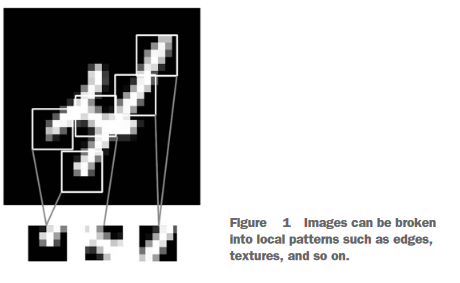

This key characteristic gives convnets two interesting properties:
*   *The patterns they learn are translation-invariant*. After learning a certain pattern in the lower-right corner of a picture, a convnet can recognize it anywhere: for example, in the upper-left corner. A densely connected model would have to learn the pattern anew if it appeared at a new location. This makes convnets data-efficient when processing images (because the *visual world is fundamentally translation-invariant*): they need fewer training samples to learn representations that have generalization power.
*   *They can learn spatial hierarchies of patterns*. A first convolution layer will learn small local patterns such as edges, a second convolution layer will learn larger patterns made of the features of the first layers, and so on (see figure 2). This allows convnets to efficiently learn increasingly complex and abstract visual concepts, because *the visual world is fundamentally spatially hierarchical*.

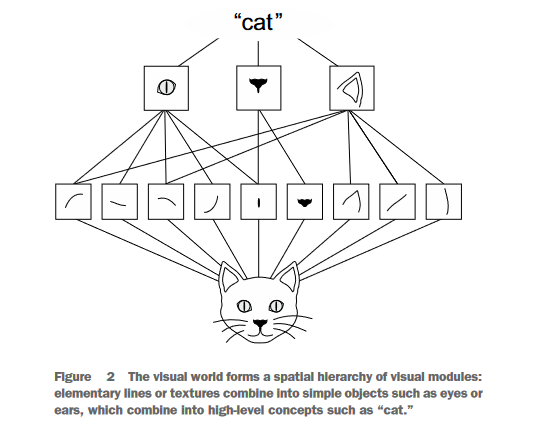

Convolutions operate over rank-3 tensors called *feature maps*, with two spatial axes (*height* and *width*) as well as a *depth* axis (also called the *channels* axis). For an RGB image, the dimension of the depth axis is 3, because the image has three color channels: red, green, and blue. For a black-and-white picture, like the MNIST digits, the depth is 1 (levels of gray). The convolution operation extracts patches from its input feature map and applies the same transformation to all of these patches, producing an *output feature map*. This output feature map is still a rank-3 tensor: it has a width and a height. Its depth can be arbitrary, because the output depth is a parameter of the layer, and the different channels in that depth axis no longer stand for specific colors as in RGB input; rather, they stand for *filters*. Filters encode specific aspects of the input data: at a high level, a single filter could encode the concept “presence of a face in the input,” for instance.

In the MNIST example, the first convolution layer takes a feature map of size `(28, 28, 1)` and outputs a feature map of size `(26, 26, 32)`: it computes 32 filters over its input. Each of these 32 output channels contains a 26 × 26 grid of values, which is a response map of the filter over the input, indicating the response of that filter pattern at different locations in the input (see figure 3).

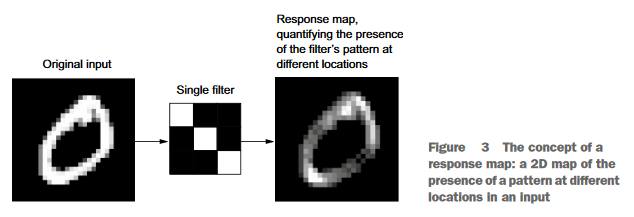

That is what the term *feature map* means: every dimension in the depth axis is a *feature* (or filter), and the rank-2 tensor `output[:, :, n]` is the 2D spatial *map* of the response of this filter over the input.

Convolutions are defined by two key parameters:
*   *Size of the patches extracted from the inputs*—These are typically 3 × 3 or 5 × 5. In the example, they were 3 × 3, which is a common choice.
*   *Depth of the output feature map*—This is the number of filters computed by the convolution. The example started with a depth of 32 and ended with a depth of 128.

In Keras `Conv2D` layers, these parameters are the first arguments passed to the layer: `Conv2D(output_depth, (window_height, window_width))`.

A convolution works by *sliding* these windows of size 3 × 3 or 5 × 5 over the 3D input feature map, stopping at every possible location, and extracting the 3D patch of surrounding features (shape `(window_height, window_width, input_depth)`). Each such 3D patch is then transformed into a 1D vector of shape `(output_depth,)`, which is done via a tensor product with a learned weight matrix, called the *convolution kernel*—the same kernel is reused across every patch. All of these vectors (one per patch) are then spatially reassembled into a 3D output map of shape `(height, width, output_depth)`. Every spatial location in the output feature map corresponds to the same location in the input feature map (for example, the lower-right corner of the output contains information about the lower-right corner of the input). For instance, with 3 × 3 windows, the vector `output[i, j, :]` comes from the 3D patch `input[i-1:i+1,j-1:j+1, :]`. The full process is detailed in figure 4.




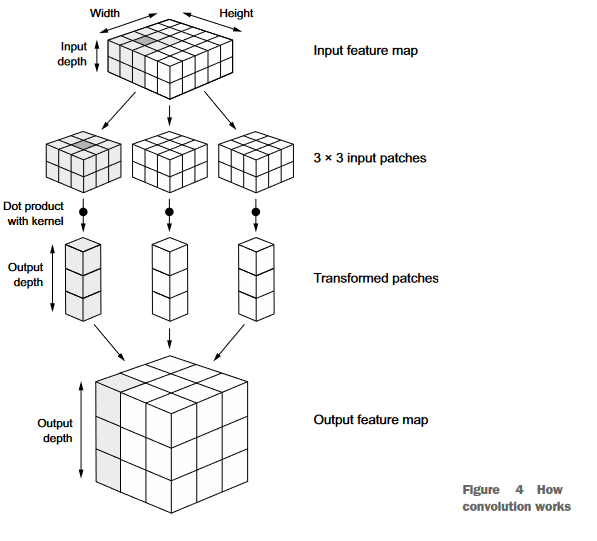

Note that the output width and height may differ from the input width and height for two reasons:
*   Border effects, which can be countered by padding the input feature map
*   The use of *strides*, which we will define below

Let's take a deeper look at these notions.

### Understanding border effects and padding

Consider a 5 × 5 feature map (25 tiles total). There are only 9 tiles around which you can center a 3 × 3 window, forming a 3 × 3 grid (see figure 5). Hence, the output feature map will be 3 × 3. It shrinks a little: by exactly two tiles alongside each dimension, in this case. You can see this border effect in action in the earlier example: you start with 28 × 28 inputs, which become 26 × 26 after the first convolution layer.

If you want to get an output feature map with the same spatial dimensions as the
input, you can use *padding*. Padding consists of adding an appropriate number of rows

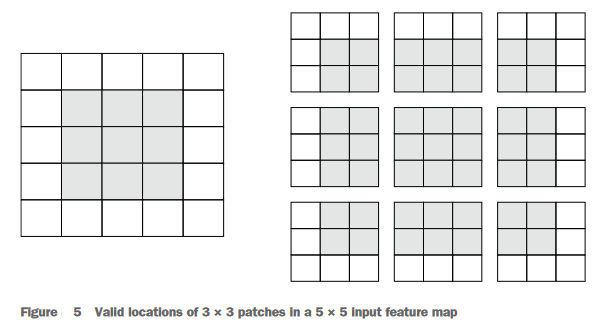

and columns on each side of the input feature map so as to make it possible to fit center convolution windows around every input tile. For a 3 × 3 window, you add one column on the right, one column on the left, one row at the top, and one row at the bottom. For a 5 × 5 window, you add two rows (see figure 6).

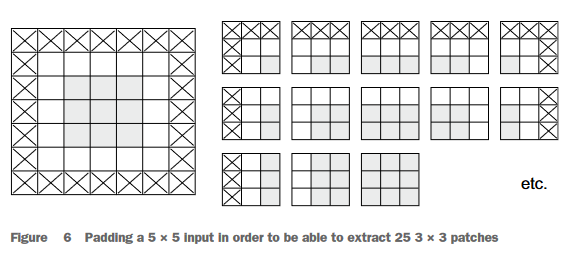

In `Conv2D` layers, padding is configurable via the padding argument, which takes two values: "valid", which means no padding (only valid window locations will be used), and "same", which means “pad in such a way as to have an output with the same width and height as the input.” The padding argument defaults to "valid".

#### Understanding convolution strides

The other factor that can influence output size is the notion of *strides*. Our description of convolution so far has assumed that the center tiles of the convolution windows are all contiguous. But the distance between two successive windows is a parameter of the convolution, called its *stride*, which defaults to 1. It's possible to have *strided convolutions*: convolutions with a stride higher than 1. In figure 7, you can see the patches extracted by a 3 × 3 convolution with stride 2 over a 5 × 5 input (without padding).

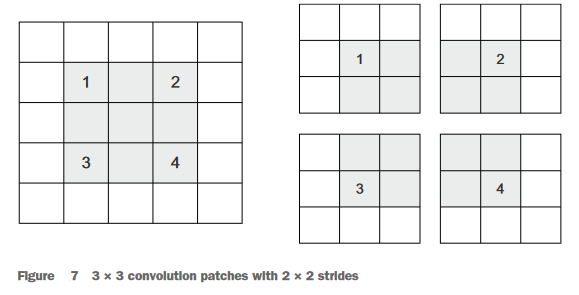

Using stride 2 means the width and height of the feature map are downsampled by a factor of 2 (in addition to any changes induced by border effects). Strided convolutions are rarely used in classification models, but they come in handy for some other types of models.

In classification models, instead of strides, we tend to use the max-pooling operation to downsample feature maps, which you saw in action in our first convnet example.
Let's look at it in more depth.

### The max-pooling operation

In the convnet example, you may have noticed that the size of the feature maps is halved after every `MaxPooling2D` layer. For instance, before the first `MaxPooling2D` layers, the feature map is 26 × 26, but the max-pooling operation halves it to 13 × 13.That's the role of max pooling: to aggressively downsample feature maps, much like strided convolutions.

Max pooling consists of extracting windows from the input feature maps and
outputting the max value of each channel. It's conceptually similar to convolution, except that instead of transforming local patches via a learned linear transformation (the convolution kernel), they're transformed via a hardcoded `max` tensor operation. A big difference from convolution is that max pooling is usually done with 2 × 2 windows and stride 2, in order to downsample the feature maps by a factor of 2. On the other hand, convolution is typically done with 3 × 3 windows and no stride (stride 1).

Why downsample feature maps this way? Why not remove the max-pooling layers
and keep fairly large feature maps all the way up? Let's look at this option. Our model would then look like the following listing.

**An incorrectly structured convnet missing its max-pooling layers**

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

Here’s a summary of the model:

In [ ]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

What's wrong with this setup? Two things:

*   It isn't conducive to learning a spatial hierarchy of features. The 3 × 3 windows in the third layer will only contain information coming from 7 × 7 windows in the initial input. The high-level patterns learned by the convnet will still be very small with regard to the initial input, which may not be enough to learn to classify digits (try recognizing a digit by only looking at it through windows that are 7 × 7 pixels). We need the features from the last convolution layer to contain information about the totality of the input.
*   The final feature map has 22 × 22 × 128 = 61,952 total coefficients per sample. This is huge. When you flatten it to stick a `Dense` layer of size 10 on top, that layer would have over half a million parameters. This is far too large for such a small model and would result in intense overfitting.

In short, the reason to use downsampling is to reduce the number of feature-map
coefficients to process, as well as to induce spatial-filter hierarchies by making successive convolution layers look at increasingly large windows (in terms of the fraction of the original input they cover).

Note that max pooling isn't the only way you can achieve such downsampling. As you have seen, you can also use strides in the prior convolution layer. And you can use average pooling instead of max pooling, where each local input patch is transformed by taking the average value of each channel over the patch, rather than the max. But max pooling tends to work better than these alternative solutions. The reason is that features tend to encode the spatial presence of some pattern or concept over the different tiles of the feature map (hence the term *feature map*), and it's more informative to look at the *maximal presence* of different features than at their *average presence*. The most reasonable subsampling strategy is to first produce dense maps of features (via unstrided convolutions) and then look at the maximal activation of the
features over small patches, rather than looking at sparser windows of the inputs (via strided convolutions) or averaging input patches, which could cause you to miss or dilute feature-presence information.

This example describes the basics of convnets—feature maps, convolution, and max pooling—and shows you how to build a small convnet to solve
a toy problem such as the MNIST digits classification.



## Summary

*   Convnets  are  the  best  type  of  machine  learning  models  for  computer vision tasks. It's possible to train one from scratch even on a very small dataset, with decent results.
*    Convnets  work  by  learning  a  hierarchy  of  modular  patterns  and  concepts  to represent the visual world.
*    On  a  small  dataset,  overfitting  will  be  the  main  issue.  Data  augmentation  is  a powerful way to fight overfitting when you're working with image data.
